# Understanding the MelSpectrogram

Here are a couple of cells that let you explore how the spectrograms look like, and easily idetefie potential problems. 


At the bottom of the note book we included the possebility to change the parameters that are used to calculate the spectrograms. These varialbes are used when generating the spectrum AND when ``running`` the network in realtime. That means onece you change it, you need to retrain your network to understand the new changes. 


## Seeing the sound:
Run the cell bellow, then select a folder and then sound, and then run the cell after that.

After a couple of seconds, you should see a play area as well as a couple of pictures showing the spectrogram for that class of sound.

In [5]:
Type="INTERFACE"
exec(open("../helperFunctions.py","rb").read())

Dropdown(description='Source for Training Data:', options=('../AudioData/Dogs', '../AudioData/Cats'), style=De…

Dropdown(description='Audio file to visualize', options=(), style=DescriptionStyle(description_width='initial'…

/Users/heewonhan/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


There where more pictures generated but I only could show these 10. Image count =  14


/Users/heewonhan/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


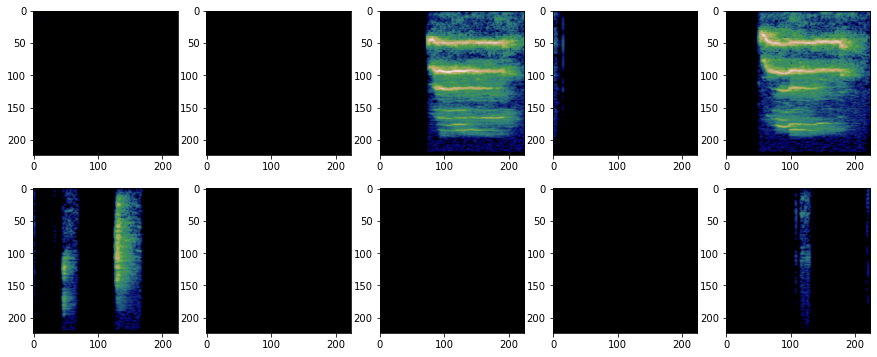

In [6]:
pictures = GenerateSpectrums(FileSelection.value)
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()
counter=0
for pic in pictures:
    if(counter>=len(axs)):
        print("There where more pictures generated but I only could show these 10. Image count = ",len(pictures))
        break;
    axs[counter].imshow(pic)
    counter+=1
x,sr= librosa.load(FileSelection.value,mono=True)
ipd.Audio(x,rate=sr)

## Spectrum Settings new settings

Changeing the settings can be done either by chaning the file ```SpectrumVarialbes.csv``` in the main folder, or by running the next two cells.


In [7]:
##SpectrographVariables
SpectrumVariables={}
SpectrumVariables["RESOLUTION"] =224
SpectrumVariables["SAMPLE_RATE"]=22500
SpectrumVariables["N_FFT"]=1024
SpectrumVariables["N_MELS"]=224
SpectrumVariables["HOP_LENGTH"]=128
SpectrumVariables["FMIN"]=10
SpectrumVariables["FMAX"]=int(22050/2)
SpectrumVariables["POWER"]=2

In [8]:
with open('../SpectrumVarialbes.csv', 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=SpectrumVariables.keys())
    writer.writeheader()
    writer.writerow(SpectrumVariables)